In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train_path = '/kaggle/input/melanoma-cancer-dataset/train'
test_path = '/kaggle/input/melanoma-cancer-dataset/test'

In [3]:
def extract_from_path(path)-> []:
    image_paths = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".jpg"):
                image_paths.append(os.path.join(root, file))
    return image_paths

In [4]:
train_images = extract_from_path(train_path)
test_images = extract_from_path(test_path)

print(f"The length of train_images is {len(train_images)}")
print(f"The length of test_images is {len(test_images)}")

The length of train_images is 11879
The length of test_images is 2000


In [5]:
#randomly shuffle the list 
import random
random.seed(42)
random.shuffle(train_images)
random.shuffle(test_images)

#### Create a pandas dataframe

In [6]:
def createDataFrame(image_paths):
    labels = [path.split('/')[-2] for path in image_paths]
    df = pd.DataFrame({'path': image_paths, 'label': labels})
    df['label_id'] = df['label'].apply(lambda x: 1 if x == 'Malignant' else 0)
    return df

In [7]:
train_images_df = createDataFrame(train_images)
test_images_df = createDataFrame(test_images)

In [8]:
train_images_df.head(10)

,path,label,label_id
0,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign,0
1,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign,0
2,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign,0
3,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign,0
4,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign,0
5,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign,0
6,/kaggle/input/melanoma-cancer-dataset/train/Be...,Benign,0
7,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant,1
8,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant,1
9,/kaggle/input/melanoma-cancer-dataset/train/Ma...,Malignant,1


In [9]:
train_images_df.iloc[1]['path']

'/kaggle/input/melanoma-cancer-dataset/train/Benign/15.jpg'

In [10]:
def plotCount(df):
    name = df["path"][0].split("/")[3]
    malignant = df[df['label_id'] == 1]
    benign = df[df['label_id'] == 0]    
    print(f"Total images in {name} is {len(df)}")
    print(f"Total malignant images is {len(malignant)} {round(len(malignant)/len(df) * 100,2)}%")
    print(f"Total benign images is {len(df)-len(malignant)} {round(len(benign)/len(df) * 100,2)}%")
    sns.set_style("whitegrid")
    sns.countplot(x='label_id', data=df)

Total images in melanoma-cancer-dataset is 11879
Total malignant images is 5590 47.06%
Total benign images is 6289 52.94%


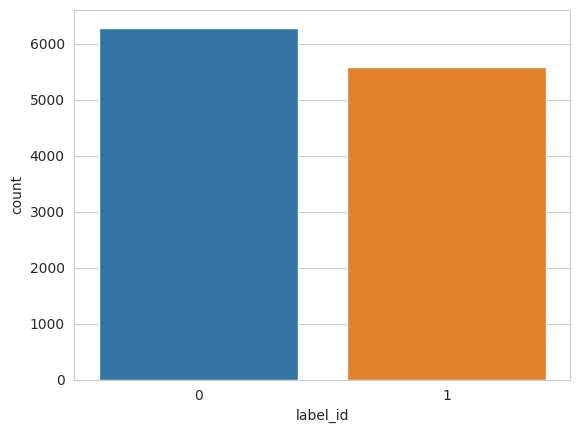

In [11]:
plotCount(train_images_df)

Total images in melanoma-cancer-dataset is 2000
Total malignant images is 1000 50.0%
Total benign images is 1000 50.0%


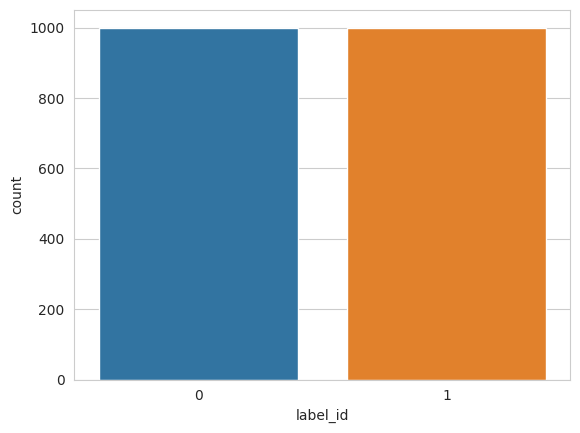

In [12]:
plotCount(test_images_df)

*As we can see in both the training and the testing dataset has almost the same no of datapoints for each class (malignant & benign)*

#### Visualize the data

In [13]:
from PIL import Image
def plot_random(df):
    img_path = df['path'].tolist()
    random_image_path = random.choice(img_path)
    image_class = random_image_path.split("/")[-2]
    img = Image.open(random_image_path)
    
    img_arr = np.array(img)
    plt.figure(figsize=(4,4))
    plt.imshow(img_arr)
    plt.title(f"Image class {image_class} \n Image shape {img_arr.shape}",fontsize = 9)
    plt.axis(False)

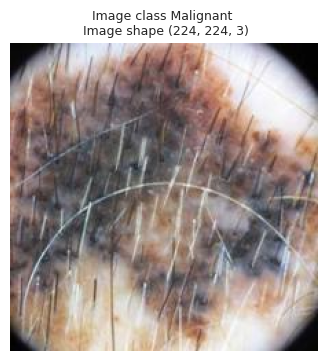

In [14]:
plot_random(train_images_df)

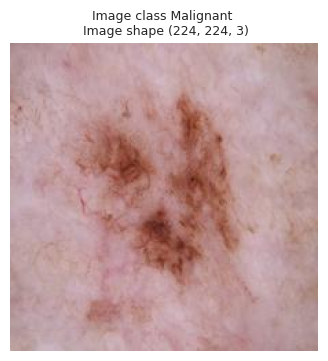

In [15]:
plot_random(train_images_df)

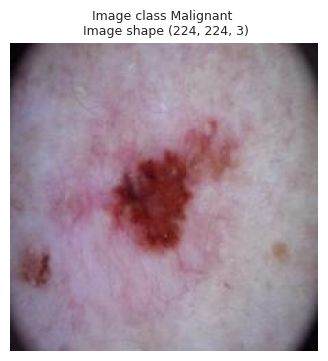

In [16]:
plot_random(train_images_df)

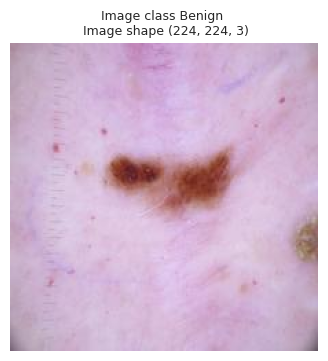

In [17]:
plot_random(train_images_df)

#### Fitting a baseline model (Efficientnet b0)

In [18]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [19]:
#cuda if availabele 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [20]:
# Write transform for image
base_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [21]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_path,
                                  transform=base_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_path, 
                                 transform=base_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 11879
    Root location: /kaggle/input/melanoma-cancer-dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 2000
    Root location: /kaggle/input/melanoma-cancer-dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
